# i.Perkenalan

Nama: Akbar Fitriawan  
Batch: HCK-14

Dataset Name : employee-attrition.csv

Dataset Description : Dataset ini merupakan dataset yang berisi apakah seorang karyawan IBM akan meninggalkan perusahaan atau tidak.



# ii. Import Libraries

In [225]:
# libraries Data Tabular
import pandas as pd 
# Libraries opersi angka
import numpy as np 

# libraries visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns 

# libararies Data preprocessing
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder , MinMaxScaler

# libraries model selection
from sklearn.model_selection import RandomizedSearchCV , train_test_split

# Libraries Model definition

# libraries model evaluate
from sklearn.metrics import accuracy_score, f1_score, classification_report , confusion_matrix,ConfusionMatrixDisplay
# libraries feature engine
from feature_engine.outliers import Winsorizer
# libraries scipy statistik
from scipy.stats import pearsonr, kendalltau, spearmanr


# iii. Load Data

In [226]:
df = pd.read_csv('employee-attrition.csv')

df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobRole,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager
0,28,No,Travel_Rarely,Research & Development,3,3,Medical,1121,Female,Manufacturing Director,...,7655,0,17,3,10,Good,9,7,1,7
1,37,Yes,Travel_Rarely,Research & Development,11,2,Medical,1033,Female,Healthcare Representative,...,4777,5,15,3,15,Bad,1,0,0,0
2,38,No,Travel_Rarely,Sales,2,2,Marketing,1125,Male,Sales Executive,...,7351,7,16,3,10,Better,1,0,0,0
3,55,Yes,Travel_Rarely,Research & Development,2,3,Medical,787,Male,Manager,...,19859,5,13,3,24,Better,5,2,1,4
4,31,No,Travel_Rarely,Sales,5,4,Life Sciences,1673,Female,Sales Executive,...,5476,1,11,3,10,Better,10,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,44,No,Travel_Rarely,Research & Development,10,4,Other,40,Male,Healthcare Representative,...,6465,2,13,3,9,Best,4,2,1,3
1466,31,No,Non-Travel,Sales,2,4,Life Sciences,1324,Female,Sales Executive,...,9852,1,19,3,10,Good,10,8,9,6
1467,30,No,Travel_Rarely,Human Resources,1,3,Life Sciences,1499,Male,Human Resources,...,2064,0,21,4,6,Best,5,3,1,3
1468,50,No,Travel_Rarely,Research & Development,9,3,Life Sciences,1030,Male,Laboratory Technician,...,2380,4,18,3,8,Better,1,0,0,0


In [227]:
df.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobRole,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager
1465,44,No,Travel_Rarely,Research & Development,10,4,Other,40,Male,Healthcare Representative,...,6465,2,13,3,9,Best,4,2,1,3
1466,31,No,Non-Travel,Sales,2,4,Life Sciences,1324,Female,Sales Executive,...,9852,1,19,3,10,Good,10,8,9,6
1467,30,No,Travel_Rarely,Human Resources,1,3,Life Sciences,1499,Male,Human Resources,...,2064,0,21,4,6,Best,5,3,1,3
1468,50,No,Travel_Rarely,Research & Development,9,3,Life Sciences,1030,Male,Laboratory Technician,...,2380,4,18,3,8,Better,1,0,0,0
1469,58,Yes,Travel_Rarely,Research & Development,2,4,Life Sciences,825,Male,Research Director,...,19246,7,12,3,40,Better,31,15,13,8


# iv. Exploratory Data Analysis (EDA)

In [228]:
df.shape

(1470, 22)

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   DistanceFromHome         1470 non-null   int64 
 5   Education                1470 non-null   int64 
 6   EducationField           1470 non-null   object
 7   EmployeeID               1470 non-null   int64 
 8   Gender                   1470 non-null   object
 9   JobRole                  1470 non-null   object
 10  JobSatisfaction          1470 non-null   object
 11  MaritalStatus            1470 non-null   object
 12  MonthlyIncome            1470 non-null   int64 
 13  NumCompaniesWorked       1470 non-null   int64 
 14  PercentSalaryHike        1470 non-null  

In [230]:
df.describe(include='number')

,Age,DistanceFromHome,Education,EmployeeID,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,1024.865306,6502.931293,2.693197,15.209524,3.153741,11.279592,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,602.024335,4707.956783,2.498009,3.659938,0.360824,7.780782,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,491.250000,2911.000000,1.000000,12.000000,3.000000,6.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1020.500000,4919.000000,2.000000,14.000000,3.000000,10.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1555.750000,8379.000000,4.000000,18.000000,3.000000,15.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,2068.000000,19999.000000,9.000000,25.000000,4.000000,40.000000,40.000000,18.000000,15.000000,17.000000


In [231]:
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,WorkLifeBalance
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,4,3,4
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Very High,Married,Better
freq,1233,1043,961,606,882,326,459,673,893


In [232]:
# cek nilai unik di setiap kolom
df.nunique().to_frame().reset_index().rename(columns={'index':'nama_kolom',0:'Nilai Unik'}).sort_values(by='Nilai Unik',ascending=False)

,nama_kolom,Nilai Unik
7,EmployeeID,1470
12,MonthlyIncome,1349
0,Age,43
16,TotalWorkingYears,40
18,YearsAtCompany,37
4,DistanceFromHome,29
19,YearsInCurrentRole,19
21,YearsWithCurrentManager,18
20,YearsSinceLastPromotion,16
14,PercentSalaryHike,15


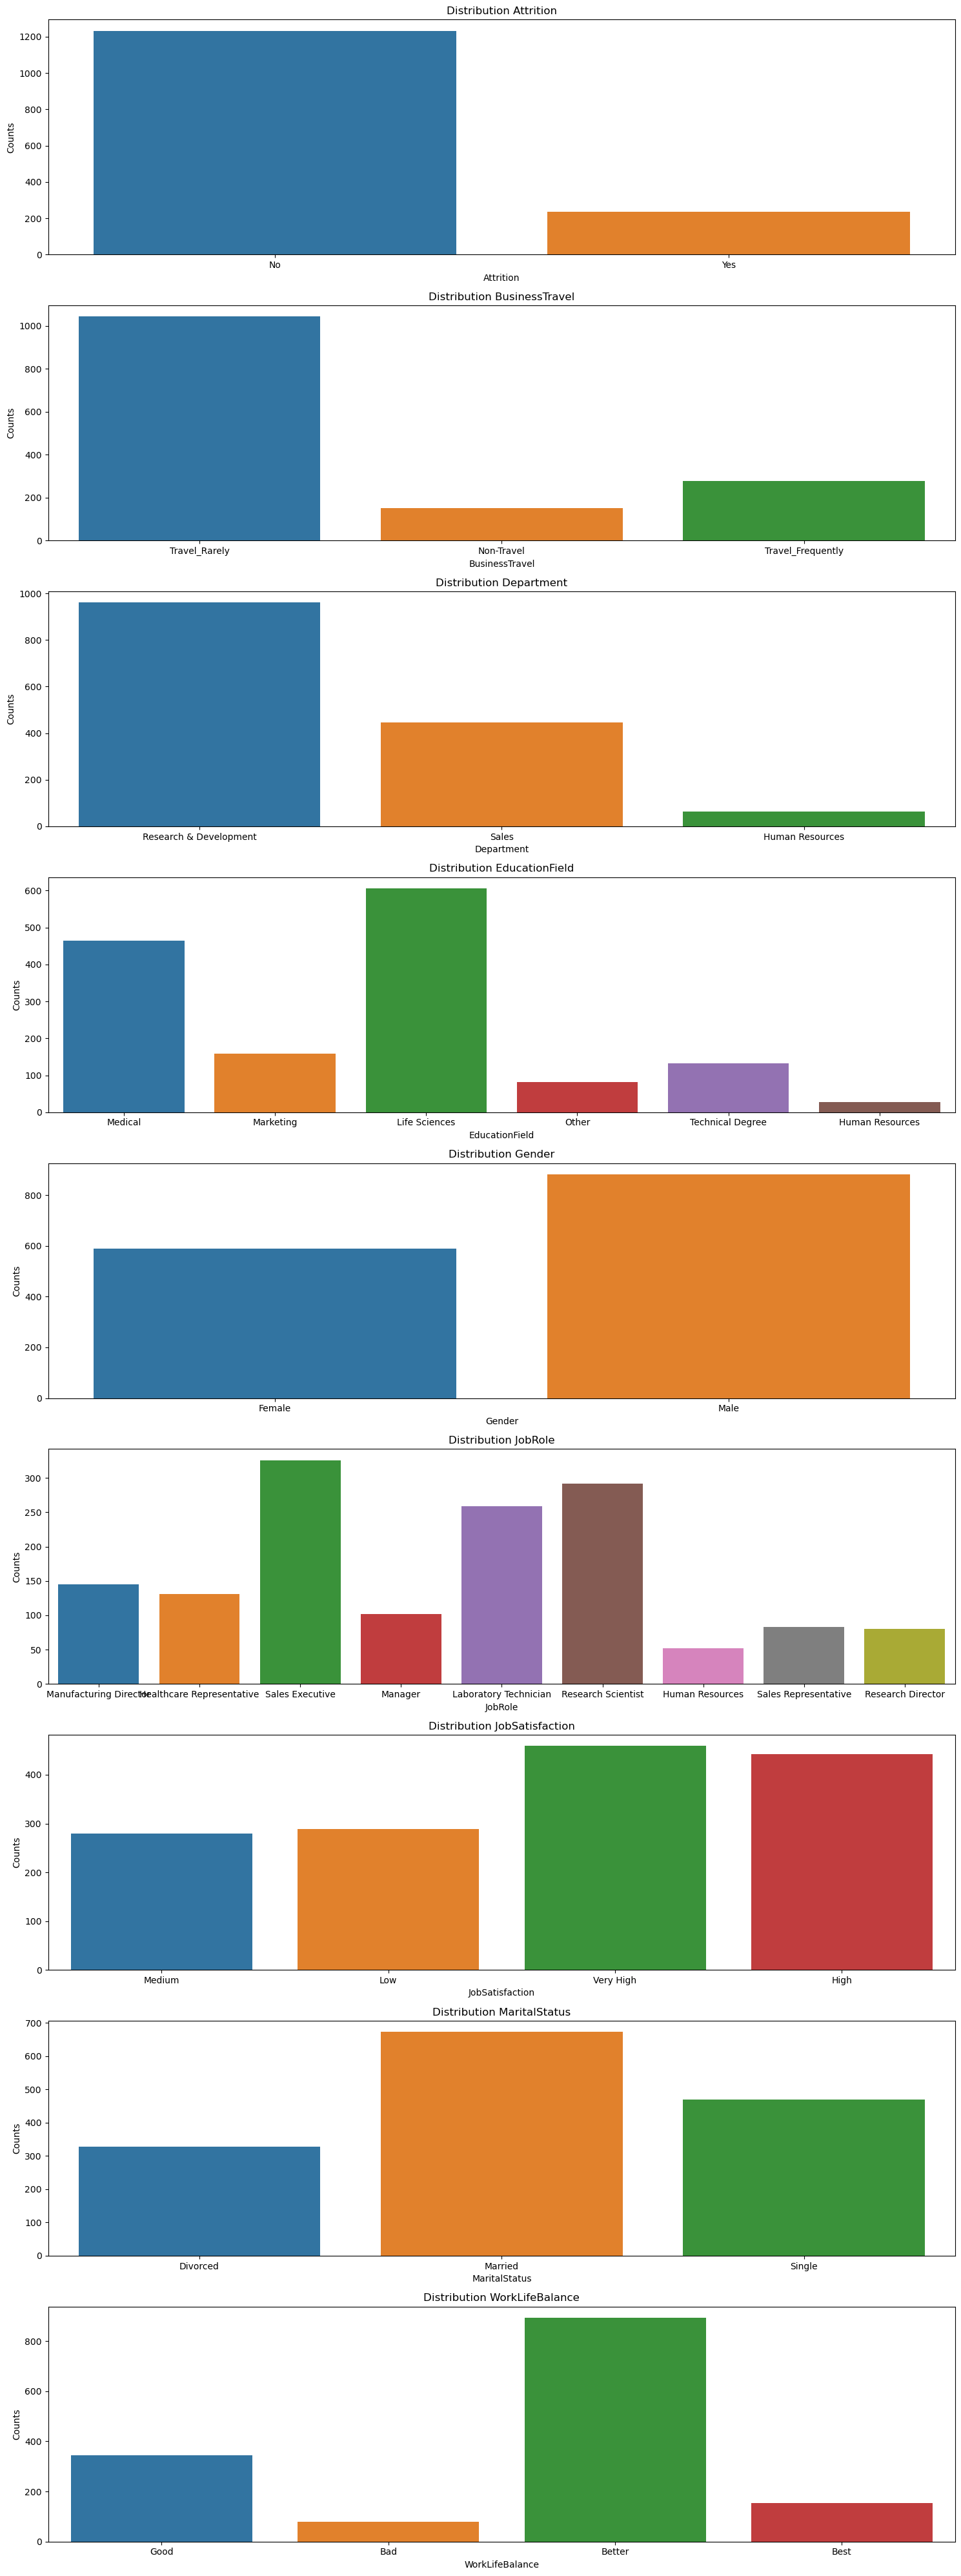

In [233]:
# kolom kategori yang di plot
list_kat = list(df.select_dtypes(include='object').columns)

# Create the subplot grid
fig, axes = plt.subplots(nrows=len(list_kat),ncols=1, figsize=(15, 40))

axes = axes.flatten()

for i, col in enumerate(list_kat):
    sns.countplot(x=col, data=df[list_kat], ax=axes[i])
    axes[i].set_title(f'Distribution {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Counts')



plt.tight_layout()
plt.show()


In [234]:
data_karyawan['unsatisfied']  = df[df['YearsAtCompany'] <= 8]
data['decent'] = df[df['YearsAtCompany'] <= 18]
data_karyawan['satisfied'] = df[df['YearsAtCompany'] <= 48]
data_karyawan['loyal'] = df[df['YearsAtCompany'] <= 120]
data_karyawan['devoted']  = df[df['YearsAtCompany'] >= 121]


SyntaxError: cannot assign to literal (3404227317.py, line 2)

# v. Feature Engineering

variable tidak digunakan

In [ ]:
df.drop('EmployeeID', axis=1, inplace=True)

#### Split Data

In [ ]:
# Split Data X Dan y

X = df.drop(['Attrition'], axis=1)
y = df['Attrition']

In [ ]:
# Split Dataset
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print('Train Size: ', X_train.shape)
print('Test size : ', X_test.shape)

Train Size:  (1176, 20)
Test size :  (294, 20)


#### Missing values

In [ ]:
X_train.isnull().sum()

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
PerformanceRating          0
TotalWorkingYears          0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrentManager    0
dtype: int64

In [ ]:
X_test.isnull().sum()

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
PerformanceRating          0
TotalWorkingYears          0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrentManager    0
dtype: int64

#### Cek Duplikat

In [ ]:
X_train.duplicated().sum()

0

#### Deteksi outlier

In [ ]:
# fungsi IQR deteksi outlier
def deteksi_outlier(df, threshold=1.5):
    ''' Fungsi IQR
    Perameters:
    - df (pandas Dataframe)
    - threshold penyesuaian iqr

    penggunaan:
    - deteksi_outlier(df=data)'''
    outliers= {}
    percentages = {}

    for col in df.columns:
        if df[col].dtypes != 'object':
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)

            iqr = (q3 - q1)

            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr

            check_outlier = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
            outliers[col]= len(check_outlier)

            if len(df[col]) != 0:
                percentage_outlier = len(check_outlier) * 100 / len(df[col])
            else:
                percentage_outlier = 0

            percentages[col] = "{:.2f}%".format(percentage_outlier)

    data = pd.DataFrame({
        'nama_col': list(outliers.keys()),
        'persen_outlier': list(percentages.values())
    })

    return data


In [ ]:
num_columns = list(X_train.select_dtypes(include='number').columns)
cat_columns = list(X_train.select_dtypes(include='object').columns)

In [ ]:
# pake cols_num
cols_num = [x for x in X_train.columns if x not in cat_columns]
# buat data dan kolom untuk normal distribusi
normal_data_num = []
cols_normal = []

# buat data dan kolom untuk Skewed
skew_data_num = []
cols_skew = []

# cek di setiap kolom
for col in cols_num:
  skewness = X_train[col].skew()

  if skewness <= 0.5 and skewness >= -0.5:
    cols_normal.append(col)
    normal_data_num.append([col,skewness])
  elif skewness < -0.5 or skewness > 0.5:
    cols_skew.append(col)
    skew_data_num.append([col, skewness])

In [ ]:
# Tampilkan data skew
pd.DataFrame(data=skew_data_num, columns=['kolom_ditribusi_skewed', 'skewness'])

,kolom_ditribusi_skewed,skewness
0,BusinessTravel,1.240432
1,Department,1.124527
2,DistanceFromHome,0.983001
3,EducationField,1.154194
4,MonthlyIncome,1.368743
5,NumCompaniesWorked,0.998492
6,PercentSalaryHike,0.873587
7,PerformanceRating,1.957298
8,TotalWorkingYears,1.126935
9,WorkLifeBalance,-0.655473


In [ ]:
# mengguanakan censoring iqr
winsorizer_skewed = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=cols_skew,
                            missing_values='ignore')
# Fit & Transforming X_train
X_train_capped = winsorizer_skewed.fit_transform(X_train)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test)

In [ ]:
sebelum_handling_train = deteksi_outlier(X_train)
sebelum_handling_train

,nama_col,persen_outlier
0,Age,0.00%
1,BusinessTravel,0.00%
2,Department,0.00%
3,DistanceFromHome,0.00%
4,Education,0.00%
5,EducationField,0.00%
6,Gender,0.00%
7,JobRole,0.00%
8,JobSatisfaction,0.00%
9,MaritalStatus,0.00%


In [ ]:
sesudah_handling_train = deteksi_outlier(X_train_capped)
sesudah_handling_train

,nama_col,persen_outlier
0,Age,0.00%
1,BusinessTravel,0.00%
2,Department,0.00%
3,DistanceFromHome,0.00%
4,Education,0.00%
5,EducationField,0.00%
6,Gender,0.00%
7,JobRole,0.00%
8,JobSatisfaction,0.00%
9,MaritalStatus,0.00%


#### Feature selection

In [235]:
X_train_num

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager
1097,35,0.0,0.0,7,2,0.0,0.0,0.0,0.0,0.0,2690,1,18,3,1,0.0,1,0,0,1
727,24,0.0,0.0,29,1,1.0,0.0,0.0,1.0,1.0,3907,1,13,3,6,1.0,6,2,1,2
254,31,0.0,1.0,2,1,0.0,0.0,1.0,0.0,2.0,6582,4,13,3,10,1.0,6,5,0,5
1175,30,1.0,0.0,9,3,1.0,0.0,0.0,1.0,1.0,3072,1,11,3,12,2.0,12,9,6,10
1341,32,2.0,1.0,5,2,0.0,0.0,1.0,2.0,0.0,6524,1,14,3,10,2.0,10,8,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,51,2.0,0.0,1,4,1.0,1.0,7.0,1.0,2.0,7484,3,20,4,23,0.0,13,12,12,8
1294,33,0.0,0.0,25,3,1.0,0.0,5.0,2.0,2.0,2313,4,20,4,5,2.0,2,2,2,2
860,55,0.0,1.0,26,5,2.0,0.0,6.0,0.0,0.0,19586,1,21,4,36,2.0,36,6,2,13
1459,36,0.0,1.0,11,4,2.0,1.0,1.0,0.0,0.0,6652,4,13,3,8,0.0,6,3,0,0


In [ ]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

In [ ]:
# Checking korelasi di kolom kategori
p_values = []
interpretation = []
cols = []
corr = []

# mecari kolom korelasi di setiap kolom menggunakan kendalltau
for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  # memasukan ke list
  p_values.append(p_value)
  cols.append(col)
  corr.append(corr_coef)

  # aturan kondisi
  if p_value < 0.05:
    interpretation.append('Significant Correlation')
  else:
    interpretation.append('No Significant Correlation')

# membuat dataframe hasil dari korelasi
dfCorr = pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Interpretation': interpretation})

dfCorr

,Column Name,Correlation Coefficient,P-value,Interpretation


In [ ]:
# Checking korelasi di kolom numerik
p_values = []
interpretation = []
cols = []
corr = []

# mencari korelasi di setiap kolom
for col in X_train_num.columns:
  if abs(X_train_num[col].skew()) < 0.5:                    #For Normally Distributed Columns
    corr_coef, p_value = pearsonr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant Correlation')
    else :
      interpretation.append('No Significant Correlation')
  else:                                                     #For Non Normally Distributed Columns
    corr_coef, p_value = spearmanr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant Correlation')
    else :
      interpretation.append('No Significant Correlation')

dfCorrNum = pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Interpretation': interpretation })

dfCorrNum

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U2')) -> None

#### scalling

In [ ]:

#Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

#Fit_transform untuk X_train, transform untuk X_test
X_train_num_scaled = scaler.fit_transform(X_train_num) ## hanya fit X_train
X_test_num_scaled = scaler.transform(X_test_num)

print(X_train_num_scaled)
print('')


#Fit_transform untuk X_train, transform untuk X_test
X_train_cat_scaled = scaler.fit_transform(X_train) ## hanya fit X_train
X_test_cat_scaled = scaler.transform(X_test)

print(X_train_cat_scaled)

ValueError: could not convert string to float: 'Age'

In [ ]:
# list kategorikal
list_cat = np.array(X_train.select_dtypes(include='object').columns)
df_list_cat = X_train[list_cat]


businessTravel = list(df_list_cat['BusinessTravel'].unique())
department = list(df_list_cat['Department'].unique())
educationField = list(df_list_cat['EducationField'].unique())
gender = list(df_list_cat['Gender'].unique())
jobRole = list(df_list_cat['JobRole'].unique())
jobSatisfaction = list(df_list_cat['JobSatisfaction'].unique())
maritalStatus = list(df_list_cat['MaritalStatus'].unique())
worklifeBalence= list(df_list_cat['WorkLifeBalance'].unique())



### Encoding

In [ ]:
# Feature Encoding - Target
le = LabelEncoder()
le.fit(y_train)

y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)
y_train_encoded

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# encoding
ord_enc = OrdinalEncoder(categories=[businessTravel, department,educationField,gender,jobRole,jobSatisfaction,maritalStatus,worklifeBalence])
ord_enc.fit(X_train[list_cat])
X_train[list_cat]= ord_enc.transform(X_train[list_cat])
X_test[list_cat]= ord_enc.transform(X_test[list_cat])


In [ ]:
X_train

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager
1097,35,0.0,0.0,7,2,0.0,0.0,0.0,0.0,0.0,2690,1,18,3,1,0.0,1,0,0,1
727,24,0.0,0.0,29,1,1.0,0.0,0.0,1.0,1.0,3907,1,13,3,6,1.0,6,2,1,2
254,31,0.0,1.0,2,1,0.0,0.0,1.0,0.0,2.0,6582,4,13,3,10,1.0,6,5,0,5
1175,30,1.0,0.0,9,3,1.0,0.0,0.0,1.0,1.0,3072,1,11,3,12,2.0,12,9,6,10
1341,32,2.0,1.0,5,2,0.0,0.0,1.0,2.0,0.0,6524,1,14,3,10,2.0,10,8,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,51,2.0,0.0,1,4,1.0,1.0,7.0,1.0,2.0,7484,3,20,4,23,0.0,13,12,12,8
1294,33,0.0,0.0,25,3,1.0,0.0,5.0,2.0,2.0,2313,4,20,4,5,2.0,2,2,2,2
860,55,0.0,1.0,26,5,2.0,0.0,6.0,0.0,0.0,19586,1,21,4,36,2.0,36,6,2,13
1459,36,0.0,1.0,11,4,2.0,1.0,1.0,0.0,0.0,6652,4,13,3,8,0.0,6,3,0,0


In [ ]:
X_test

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager
1041,24,0.0,0.0,17,2,0.0,1.0,0.0,2.0,0.0,2210,1,13,3,1,3.0,1,0,0,0
184,30,1.0,0.0,1,1,0.0,0.0,2.0,3.0,2.0,8474,1,22,4,12,2.0,11,8,5,8
1222,31,2.0,0.0,1,1,0.0,1.0,2.0,1.0,0.0,4148,1,12,3,4,2.0,4,3,0,3
67,43,2.0,0.0,17,3,3.0,0.0,5.0,3.0,0.0,2437,9,16,3,6,2.0,1,0,0,0
220,40,0.0,0.0,2,3,1.0,1.0,0.0,3.0,0.0,3448,6,22,4,20,2.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,41,2.0,0.0,9,3,1.0,0.0,4.0,3.0,1.0,19419,2,17,3,21,1.0,18,16,0,11
560,35,0.0,0.0,27,1,1.0,1.0,5.0,1.0,2.0,2559,1,11,3,6,0.0,6,5,1,1
945,40,0.0,1.0,2,2,2.0,1.0,1.0,2.0,0.0,5677,3,14,3,15,2.0,11,8,5,10
522,40,0.0,0.0,19,2,1.0,0.0,0.0,0.0,0.0,2741,8,15,3,15,1.0,7,2,3,7


# vi. Model Definition

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

svm_clf = SVC(kernel='rbf', probability=True, random_state=42)
dt_clf = DecisionTreeClassifier(max_depth=6, random_state=42)

In [ ]:
# Model Training

## Hard Voting
voting_hard_clf = VotingClassifier(
    estimators=[ ('svc', svm_clf), ('dt', dt_clf)],
    voting='hard')

## Soft Voting
voting_soft_clf = VotingClassifier(
    estimators=[ ('svc', svm_clf), ('dt', dt_clf)],
    voting='soft')

voting_hard_clf.fit(X_train_scaled, y_train_encoded)
voting_soft_clf.fit(X_train_scaled, y_train_encoded)

# vii. Model Training

In [ ]:
# Model Training

## Hard Voting
voting_hard_clf = VotingClassifier(
    estimators=[('logreg', log_clf), ('svc', svm_clf), ('dt', dt_clf)],
    voting='hard')

## Soft Voting
voting_soft_clf = VotingClassifier(
    estimators=[('logreg', log_clf), ('svc', svm_clf), ('dt', dt_clf)],
    voting='soft')

voting_hard_clf.fit(X_train_scaled, y_train_encoded)
voting_soft_clf.fit(X_train_scaled, y_train_encoded)

In [ ]:
# Predict New Instance

new_instance = [[1.2, 1.2, 3, 2]]
new_instance = np.array(new_instance)
new_instance = scaler.transform(new_instance)
new_instance

In [ ]:


print('From SVM : ', voting_hard_clf.named_estimators_['svc'].predict(new_instance))
print('From Decision Tree : ', voting_hard_clf.named_estimators_['dt'].predict(new_instance))
print('Final Result : ', voting_hard_clf.predict(new_instance))

# viii. Model Evaluation

In [ ]:
# Model Evaluation

y_pred_hard = voting_hard_clf.predict(X_test_scaled)
y_pred_soft = voting_soft_clf.predict(X_test_scaled)

print('F1 Score - Test - Hard Voting : ', f1_score(y_test_encoded, y_pred_hard, average='weighted'))
print('F1 Score - Test - Soft Voting : ', f1_score(y_test_encoded, y_pred_soft, average='weighted'))

In [ ]:
# Predict using Soft Voting Classifier

print('From Logistic Regression : ', voting_soft_clf.named_estimators_['logreg'].predict_proba(new_instance), ' -> Class : ', voting_soft_clf.named_estimators_['logreg'].predict(new_instance))
print('From SVM : ', voting_soft_clf.named_estimators_['svc'].predict_proba(new_instance), ' -> Class : ', voting_soft_clf.named_estimators_['svc'].predict(new_instance))
print('From Decision Tree : ', voting_soft_clf.named_estimators_['dt'].predict_proba(new_instance), ' -> Class : ', voting_soft_clf.named_estimators_['dt'].predict(new_instance))
print('Final Result : ', voting_soft_clf.predict_proba(new_instance), ' -> Class : ', voting_soft_clf.predict(new_instance))

# ix. Model Saving

In [ ]:
# Drop a random row
random_index = np.random.randint(0, len(df))
inference = df.iloc[random_index]

# Drop the row from the DataFrame
df.drop(index=random_index, inplace=True)

# Save the modified DataFrame to CSV
df.to_csv('modified_dataset.csv', index=False)

# Save the dropped row (inference) to CSV
inference.to_csv('inference.csv', index=False)

# x. Model Inference

# xi. Pengambilan Kesimpulan